In [3]:
import pandas as pd
#initialise the number of weeks for the dataset
num_weeks = 13 #13

#initialise the date for the first week of the dataset (week ending on start_date)
start_date = filedate = pd.Timestamp('2019-10-05 00:00:00')

#initialise the regex for the MTA turnstile url
filename_regex = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"

filelist = []

for numfiles in range (num_weeks):

    # create the appropriate filename for the week
    filedate_str = str(filedate.year)[2:4] + str(filedate.month).zfill(2) + str(filedate.day).zfill(2)
    filename = filename_regex.format(filedate_str)

    # read the file and append it to the list of files to be concacated
    df = pd.read_csv(filename, parse_dates=['DATE'], keep_date_col=True)
    filelist.append(df)

    # advance to the next week
    filedate += pd.Timedelta(days=7)

mta_test = pd.concat(filelist, axis=0, ignore_index=True)
mta_test.rename(columns={'EXITS                                                               ':'EXITS'}, inplace=True)

col = ['STATION','C/A','UNIT','SCP','DATE','TIME']
## gets the number of entries and exits
# mta_entries = mta_test.groupby(col).ENTRIES.max() - mta_test.groupby(col).ENTRIES.min()
# mta_exits = mta_test.groupby(col).EXITS.max() - mta_test.groupby(col).EXITS.min()

# ## flattens the data
# mta_entries_flat = mta_entries.reset_index()
# mta_exits_flat = mta_exits.reset_index()

# mta_entries_exits = pd.merge(mta_entries_flat, mta_exits_flat, how='outer')
mta_entries_exits = mta_test
mta_entries_exits

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,00:00:00,REGULAR,7215740,2444319
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,04:00:00,REGULAR,7215766,2444322
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,08:00:00,REGULAR,7215788,2444357
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,12:00:00,REGULAR,7215862,2444436
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,16:00:00,REGULAR,7216108,2444474
...,...,...,...,...,...,...,...,...,...,...,...
2681015,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-27,04:00:00,REGULAR,5554,420
2681016,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-27,08:00:00,REGULAR,5554,420
2681017,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-27,12:00:00,REGULAR,5554,420
2681018,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-27,16:00:00,REGULAR,5554,420


In [6]:
mta_entries_exits.sort_values("ENTRIES")

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,WEEKDAY,WEEKDAY_INDEX,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1887408,G015,R312,01-05-01,W 8 ST-AQUARIUM,FQ,BMT,2019-12-03,23:00:00,REGULAR,0,721,Tuesday,1,2019-12-03,0.000000e+00,0.0
273361,N123B,R439,01-05-01,ROCKAWAY AV,C,IND,2019-10-11,09:00:00,REGULAR,0,8,Friday,4,2019-10-11,0.000000e+00,0.0
273362,N123B,R439,01-05-01,ROCKAWAY AV,C,IND,2019-10-11,13:00:00,REGULAR,0,8,Friday,4,2019-10-11,0.000000e+00,0.0
273363,N123B,R439,01-05-01,ROCKAWAY AV,C,IND,2019-10-11,17:00:00,REGULAR,0,8,Friday,4,2019-10-11,0.000000e+00,0.0
273364,N123B,R439,01-05-01,ROCKAWAY AV,C,IND,2019-10-11,21:00:00,REGULAR,0,8,Friday,4,2019-10-11,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57079,N078,R175,01-00-03,14 ST,ACEL,IND,2019-09-28,17:00:00,REGULAR,2129063988,1155390244,Saturday,5,2019-09-28,2.129064e+09,423.0
57078,N078,R175,01-00-03,14 ST,ACEL,IND,2019-09-28,13:00:00,REGULAR,2129064411,1155390900,Saturday,5,2019-09-28,2.129065e+09,160.0
57077,N078,R175,01-00-03,14 ST,ACEL,IND,2019-09-28,09:00:00,REGULAR,2129064571,1155391412,Saturday,5,2019-09-28,2.129065e+09,33.0
57076,N078,R175,01-00-03,14 ST,ACEL,IND,2019-09-28,05:00:00,REGULAR,2129064604,1155391548,Saturday,5,2019-09-28,2.129065e+09,67.0


In [7]:
## append weekday and traffic column to dataset
mta_entries_exits['WEEKDAY'] = mta_entries_exits['DATE'].dt.day_name()
# mta_entries_exits['TRAFFIC'] = mta_entries_exits['ENTRIES'] + mta_entries_exits['EXITS']
mta_entries_exits['WEEKDAY_INDEX'] = mta_entries_exits['DATE'].dt.weekday

# mta_entries_exits.sort_values(by="TRAFFIC")

mta_entries_exits[["PREV_DATE", "PREV_ENTRIES"]] = (mta_entries_exits
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))
# mta_entries_exits.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0?
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
mta_entries_exits["DAILY_ENTRIES"] = mta_entries_exits.apply(get_daily_counts, axis=1, max_counter=1000000)
mta_entries_exits[mta_entries_exits["ENTRIES"] < mta_entries_exits["PREV_ENTRIES"]]
# # to int
mta_entries_exits["PREV_ENTRIES"] = mta_entries_exits["PREV_ENTRIES"].astype('int64')
mta_entries_exits["DAILY_ENTRIES"] = mta_entries_exits["DAILY_ENTRIES"].astype('int64')
# mta_entries_exits.to_csv('out.csv', index=False)
mta_entries_exits

<ipython-input-7-a523120e8321>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta_entries_exits[["PREV_DATE", "PREV_ENTRIES"]] = (mta_entries_exits


ValueError: Cannot convert non-finite values (NA or inf) to integer

In [8]:
# mta_entries_exits= mta_entries_exits[mta_entries_exits['ENTRIES'] != 0]
mta_entries_exits.drop(mta_entries_exits.index[mta_entries_exits['ENTRIES'] == 0], inplace = True)
mta_entries_exits

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,WEEKDAY,WEEKDAY_INDEX,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,00:00:00,REGULAR,7215740,2444319,Saturday,5,NaT,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,04:00:00,REGULAR,7215766,2444322,Saturday,5,2019-09-28,7215740.0,26.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,08:00:00,REGULAR,7215788,2444357,Saturday,5,2019-09-28,7215766.0,22.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,12:00:00,REGULAR,7215862,2444436,Saturday,5,2019-09-28,7215788.0,74.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,16:00:00,REGULAR,7216108,2444474,Saturday,5,2019-09-28,7215862.0,246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681015,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-27,04:00:00,REGULAR,5554,420,Friday,4,2019-12-27,5554.0,0.0
2681016,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-27,08:00:00,REGULAR,5554,420,Friday,4,2019-12-27,5554.0,0.0
2681017,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-27,12:00:00,REGULAR,5554,420,Friday,4,2019-12-27,5554.0,0.0
2681018,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-27,16:00:00,REGULAR,5554,420,Friday,4,2019-12-27,5554.0,0.0


In [9]:
mta_entries_exits.DATE = mta_entries_exits['DATE'].astype('str')
mta_entries_exits.info()
mta_entries_exits

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2639427 entries, 0 to 2681019
Data columns (total 16 columns):
 #   Column         Dtype         
---  ------         -----         
 0   C/A            object        
 1   UNIT           object        
 2   SCP            object        
 3   STATION        object        
 4   LINENAME       object        
 5   DIVISION       object        
 6   DATE           object        
 7   TIME           object        
 8   DESC           object        
 9   ENTRIES        int64         
 10  EXITS          int64         
 11  WEEKDAY        object        
 12  WEEKDAY_INDEX  int64         
 13  PREV_DATE      datetime64[ns]
 14  PREV_ENTRIES   float64       
 15  DAILY_ENTRIES  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(10)
memory usage: 342.3+ MB


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,WEEKDAY,WEEKDAY_INDEX,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,00:00:00,REGULAR,7215740,2444319,Saturday,5,NaT,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,04:00:00,REGULAR,7215766,2444322,Saturday,5,2019-09-28,7215740.0,26.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,08:00:00,REGULAR,7215788,2444357,Saturday,5,2019-09-28,7215766.0,22.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,12:00:00,REGULAR,7215862,2444436,Saturday,5,2019-09-28,7215788.0,74.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,16:00:00,REGULAR,7216108,2444474,Saturday,5,2019-09-28,7215862.0,246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681015,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-27,04:00:00,REGULAR,5554,420,Friday,4,2019-12-27,5554.0,0.0
2681016,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-27,08:00:00,REGULAR,5554,420,Friday,4,2019-12-27,5554.0,0.0
2681017,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-27,12:00:00,REGULAR,5554,420,Friday,4,2019-12-27,5554.0,0.0
2681018,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-27,16:00:00,REGULAR,5554,420,Friday,4,2019-12-27,5554.0,0.0


In [10]:
mta_entries_exits["DATE_TIME"] = pd.to_datetime(mta_entries_exits.DATE + " " + mta_entries_exits.TIME, 
                                            format="%Y-%m-%d %H:%M:%S")

In [11]:
mta_entries_exits

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,WEEKDAY,WEEKDAY_INDEX,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,00:00:00,REGULAR,7215740,2444319,Saturday,5,NaT,NaN,NaN,2019-09-28 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,04:00:00,REGULAR,7215766,2444322,Saturday,5,2019-09-28,7215740.0,26.0,2019-09-28 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,08:00:00,REGULAR,7215788,2444357,Saturday,5,2019-09-28,7215766.0,22.0,2019-09-28 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,12:00:00,REGULAR,7215862,2444436,Saturday,5,2019-09-28,7215788.0,74.0,2019-09-28 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,16:00:00,REGULAR,7216108,2444474,Saturday,5,2019-09-28,7215862.0,246.0,2019-09-28 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681015,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-27,04:00:00,REGULAR,5554,420,Friday,4,2019-12-27,5554.0,0.0,2019-12-27 04:00:00
2681016,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-27,08:00:00,REGULAR,5554,420,Friday,4,2019-12-27,5554.0,0.0,2019-12-27 08:00:00
2681017,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-27,12:00:00,REGULAR,5554,420,Friday,4,2019-12-27,5554.0,0.0,2019-12-27 12:00:00
2681018,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-27,16:00:00,REGULAR,5554,420,Friday,4,2019-12-27,5554.0,0.0,2019-12-27 16:00:00


In [12]:
mta_entries_exits.index = mta_entries_exits['DATE_TIME']
#mta_entries_exits.set_index('DATE_TIME')
mta_entries_exits.index = pd.to_datetime(mta_entries_exits.index)
mta_entries_exits

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,WEEKDAY,WEEKDAY_INDEX,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DATE_TIME
DATE_TIME,,,,,,,,,,,,,,,,,
2019-09-28 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,00:00:00,REGULAR,7215740,2444319,Saturday,5,NaT,NaN,NaN,2019-09-28 00:00:00
2019-09-28 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,04:00:00,REGULAR,7215766,2444322,Saturday,5,2019-09-28,7215740.0,26.0,2019-09-28 04:00:00
2019-09-28 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,08:00:00,REGULAR,7215788,2444357,Saturday,5,2019-09-28,7215766.0,22.0,2019-09-28 08:00:00
2019-09-28 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,12:00:00,REGULAR,7215862,2444436,Saturday,5,2019-09-28,7215788.0,74.0,2019-09-28 12:00:00
2019-09-28 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-28,16:00:00,REGULAR,7216108,2444474,Saturday,5,2019-09-28,7215862.0,246.0,2019-09-28 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27 04:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-27,04:00:00,REGULAR,5554,420,Friday,4,2019-12-27,5554.0,0.0,2019-12-27 04:00:00
2019-12-27 08:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-27,08:00:00,REGULAR,5554,420,Friday,4,2019-12-27,5554.0,0.0,2019-12-27 08:00:00
2019-12-27 12:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-27,12:00:00,REGULAR,5554,420,Friday,4,2019-12-27,5554.0,0.0,2019-12-27 12:00:00


In [16]:
#to get all stations traffic for one day
total_daily_traffic=mta_entries_exits.resample('1D')['DAILY_ENTRIES'].sum()

In [14]:
import matplotlib.pyplot as plt

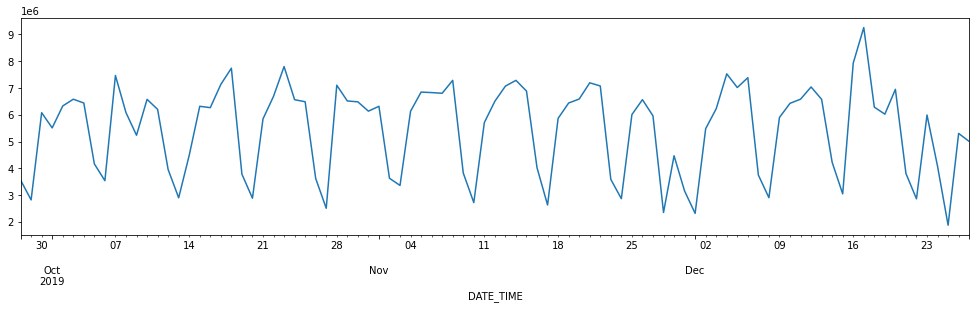

In [28]:
plt.figure(figsize=(17,4))
total_daily_traffic.plot( kind = 'line' )
plt.show()

#### the above plot shows the daily traffic in all New York from October to the December where you can notice a peak at the end of the graph where the holiday season is

In [32]:
ny_map = plt.imread('D:\Downloads\Telegram Desktop\juriProject\map.png')

In [38]:
df = pd.read_csv('D:\Downloads\\test.txt')
df.head()

,lon,lat
0,-73.98189,40.76807
1,-73.98417,40.76896


In [39]:
# BBox = ((df.lon.min(), df.lon.max(), df.lat.max(), df.lat.min()))
BBox = ((-74.2671, -73.6784, 40.4953, 40.9076))
BBox

(-74.2671, -73.6784, 40.4953, 40.9076)

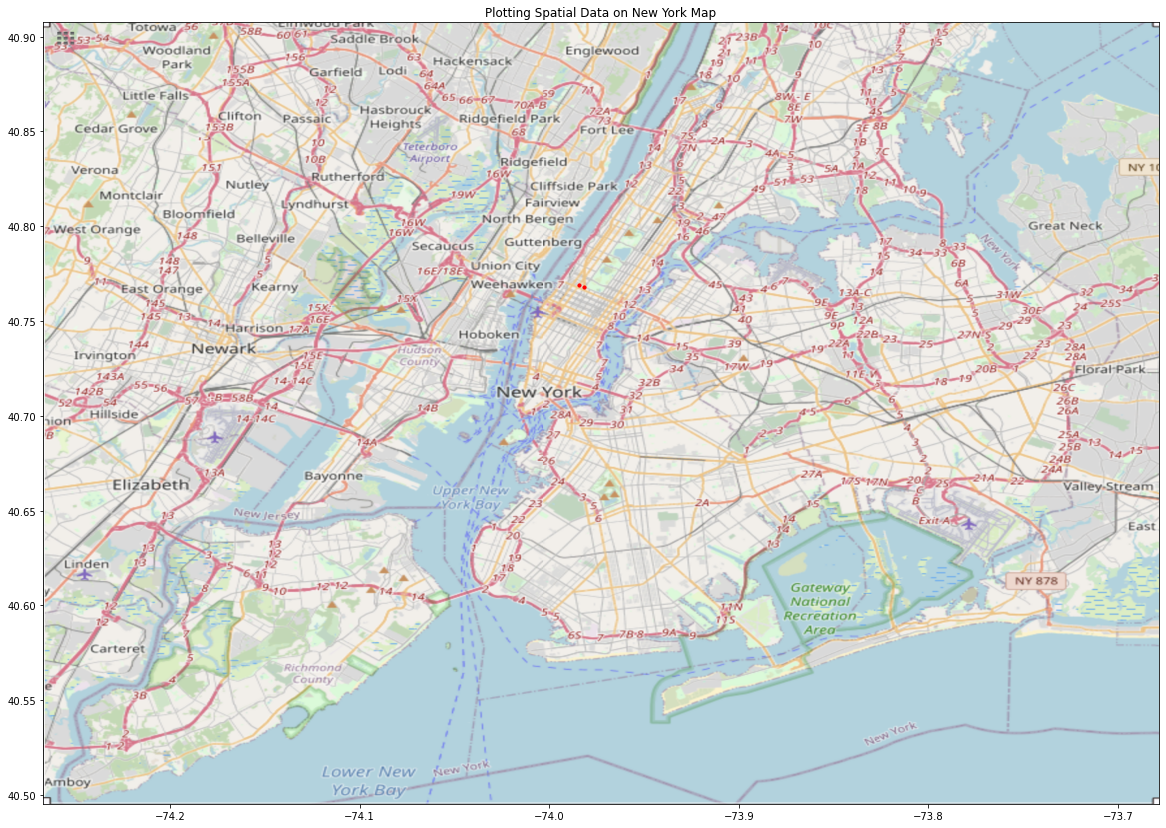

In [40]:
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(df.lon, df.lat, zorder=1, alpha= 1, c='r', s=10)
ax.set_title('Plotting Spatial Data on New York Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ny_map, zorder=0, extent = BBox, aspect= 'equal')

### Analysis of Subway Traffic near Landmark Locations

The focus of the data analysis is to find at which areas (where the attractions are) are more crowded at 
what months or weeks specially during the holiday seasons.
Due to our client needs, the subset of the data is turned into days instead or time with specific hours 
during the day. 
For an example as seen on the geographic scatter plot, the red dots represent traffic of stations of an 
area near a specific landmark. As shown above is the Columbus Circle and Coliseum Park